<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/ARIMA_Currency_Not_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
!pip install pmdarima

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
import pandas as pd
import numpy as np

In [192]:
df_USD_EUR=pd.read_csv('/content/drive/MyDrive/dissertation/df_USD_EUR.csv')
df_USD_EUR['Date'] = pd.to_datetime(df_USD_EUR['Date'])

df_USD_EUR=df_USD_EUR.set_index('Date')
df_USD_EUR

,Original_USD_EUR_Price
Date,
2020-01-02,1.122083
2020-01-03,1.117144
2020-01-06,1.116196
2020-01-07,1.119799
2020-01-08,1.115474
...,...
2023-06-27,1.091048
2023-06-28,1.095722
2023-06-29,1.091584


In [193]:
df_USD_EUR['Original_USD_EUR_Price_diff']=df_USD_EUR['Original_USD_EUR_Price'].diff()
df_USD_EUR

,Original_USD_EUR_Price,Original_USD_EUR_Price_diff
Date,,
2020-01-02,1.122083,NaN
2020-01-03,1.117144,-0.004939
2020-01-06,1.116196,-0.000948
2020-01-07,1.119799,0.003603
2020-01-08,1.115474,-0.004326
...,...,...
2023-06-27,1.091048,0.000381
2023-06-28,1.095722,0.004674
2023-06-29,1.091584,-0.004138


In [194]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_USD_EUR['Original_USD_EUR_Price_diff'].dropna(), test='adf')  # 2



0

In [195]:
def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title('PACF')
    plt.show()


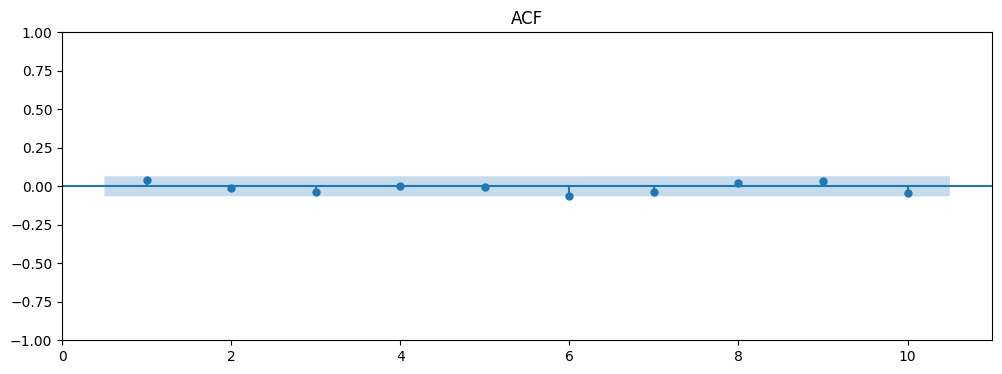

In [196]:
plot_acf_values(df_USD_EUR['Original_USD_EUR_Price_diff'].dropna(), lags=10)


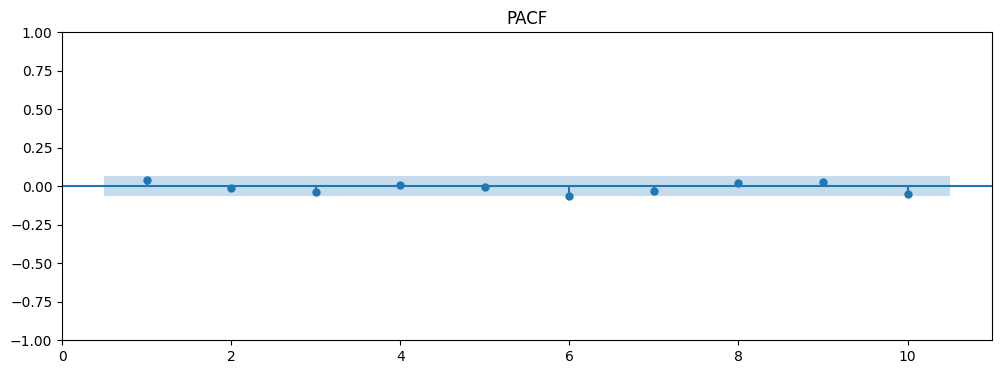

In [197]:
plot_pacf_values(df_USD_EUR['Original_USD_EUR_Price_diff'].dropna(), lags=10)


In [198]:
# Define the start and end dates for train and test data
train_start_date = pd.to_datetime('2018-01-01')
train_end_date = pd.to_datetime('2022-12-31')
test_start_date = pd.to_datetime('2023-01-01')


In [199]:
train_data_currency = df_USD_EUR[(df_USD_EUR.index >= train_start_date) & (df_USD_EUR.index <= train_end_date)]
test_data_currency = df_USD_EUR[df_USD_EUR.index >= test_start_date]
train_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_diff
Date,,
2020-01-02,1.122083,NaN
2020-01-03,1.117144,-0.004939
2020-01-06,1.116196,-0.000948
2020-01-07,1.119799,0.003603
2020-01-08,1.115474,-0.004326


In [200]:
print('Training data shape Currency: ', train_data_currency.shape)
print('Test data shape Currency: ', test_data_currency.shape)


Training data shape Currency:  (782, 2)
Test data shape Currency:  (131, 2)


In [201]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")



In [202]:
perform_adfuller(train_data_currency['Original_USD_EUR_Price_diff'].dropna())

Augmented Dickey-Fuller Test:
Test Statistic: -26.1120698196496
P-value: 0.0
The time series is stationary.


In [203]:
model = auto_arima(train_data_currency['Original_USD_EUR_Price_diff'].dropna(),
                   start_p=1, start_q=1,
                      max_p=5, max_q=5, # maximum p and q
                      d=0,              # frequency of series
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5944.585, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5945.141, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-5946.582, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-5946.530, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-5944.590, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-5942.596, Time=0.52 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5944.704, Time=0.20 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.869 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  781
Model:               SARIMAX(1, 0, 0)   Log Likelihood                2975.291
Date:                Wed, 05 Jul 2023   AIC                          -5946.582
Time:                        07:28:26   BIC                          -5937.261
Sample:                    01-03-2020   HQIC                         -5942.998
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0663      0.033      1.992      0.046       0.001       0.132
sigma2      2.874e-05   1.09e-06     26.372      0.000    2.66e-05    3.09e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                88.73
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [204]:
import warnings
warnings.filterwarnings("ignore")


In [205]:
def arima_model_fit(dataframe,columnname,p,d,q,exog=None):
  model=ARIMA(dataframe[columnname].dropna(),order=(p,d,q))
  model_fit=model.fit()
  return model_fit

In [206]:
cur_model=ARIMA(train_data_currency['Original_USD_EUR_Price_diff'].dropna(),order=(1,0,2))
cur_model_fit=cur_model.fit()
cur_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     Original_USD_EUR_Price_diff   No. Observations:                  781
Model:                          ARIMA(1, 0, 2)   Log Likelihood                2975.474
Date:                         Wed, 05 Jul 2023   AIC                          -5940.949
Time:                                 07:28:26   BIC                          -5917.646
Sample:                             01-03-2020   HQIC                         -5931.987
                                  - 12-30-2022                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.375e-05      0.000     -0.354      0.723      -0.000       0.000
ar.L1         -0.5082      1.715     -0.296      0.767      -3.869       2.853
ma.L1          0.5746      1.713      0.335      0.737      -2.784       3.933
ma.L2          0.0455      0.105      0.435      0.664      -0.160       0.251
sigma2       2.87e-05   1.12e-06     25.543      0.000    2.65e-05    3.09e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                87.12
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

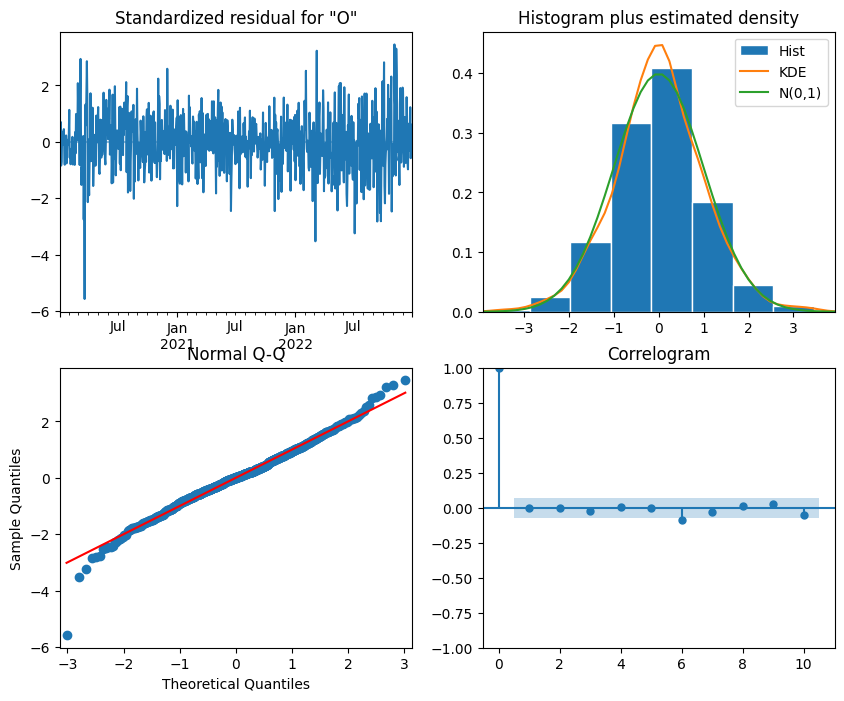

In [207]:
cur_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


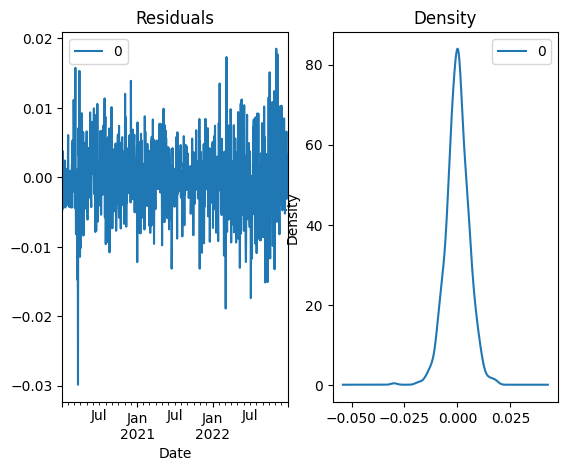

In [208]:
# Plot residual errors
residuals = pd.DataFrame(cur_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [209]:
# Get in-sample predictions
training_data_predictions = cur_model_fit.get_prediction(start=train_data_currency.dropna().index.min(),
                                                      end=train_data_currency.dropna().index.max(),
                                                      dynamic=False)

train_data_currency[['lower Cur predictions','Higher Cur predictions']] = training_data_predictions.conf_int()



# Create a new column for the predicted values
train_data_currency['Cur predictions'] = training_data_predictions.predicted_mean


train_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_diff,lower Cur predictions,Higher Cur predictions,Cur predictions
Date,,,,,
2020-01-02,1.122083,NaN,NaN,NaN,NaN
2020-01-03,1.117144,-0.004939,-0.010598,0.010451,-0.000074
2020-01-06,1.116196,-0.000948,-0.010900,0.010103,-0.000399
2020-01-07,1.119799,0.003603,-0.010666,0.010335,-0.000166
2020-01-08,1.115474,-0.004326,-0.010303,0.010699,0.000198
...,...,...,...,...,...
2022-12-26,1.066780,0.006447,-0.010618,0.010383,-0.000117
2022-12-27,1.064022,-0.002758,-0.010138,0.010863,0.000363
2022-12-28,1.063717,-0.000306,-0.010704,0.010296,-0.000204


In [210]:
testing_data_forecast = cur_model_fit.get_forecast(steps=len(test_data_currency), alpha=0.05)


# Create a new dataframe to hold the forecast
test_data_currency[['lower Cur predictions','Higher Cur predictions']] = testing_data_forecast.conf_int()

# Create a new column for the forecasted values
test_data_currency['Cur predictions'] =  testing_data_forecast.predicted_mean


test_data_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_diff,lower Cur predictions,Higher Cur predictions,Cur predictions
Date,,,,,
2023-01-02,1.070973,0.004898,-0.010386,0.010615,0.000114
2023-01-03,1.067771,-0.003202,-0.010546,0.010501,-0.000022
2023-01-04,1.054685,-0.013086,-0.010624,0.010424,-0.000100
2023-01-05,1.060637,0.005951,-0.010585,0.010464,-0.000060
2023-01-06,1.052222,-0.008415,-0.010605,0.010444,-0.000081
...,...,...,...,...,...
2023-06-27,1.091048,0.000381,-0.010598,0.010451,-0.000074
2023-06-28,1.095722,0.004674,-0.010598,0.010451,-0.000074
2023-06-29,1.091584,-0.004138,-0.010598,0.010451,-0.000074


In [211]:
df_currency = pd.concat([train_data_currency, test_data_currency])
df_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_diff,lower Cur predictions,Higher Cur predictions,Cur predictions
Date,,,,,
2020-01-02,1.122083,NaN,NaN,NaN,NaN
2020-01-03,1.117144,-0.004939,-0.010598,0.010451,-0.000074
2020-01-06,1.116196,-0.000948,-0.010900,0.010103,-0.000399
2020-01-07,1.119799,0.003603,-0.010666,0.010335,-0.000166
2020-01-08,1.115474,-0.004326,-0.010303,0.010699,0.000198


#Reversing the diff change

In [212]:
df_currency['Original_USD_EUR_Price_predicted'] = df_currency['Cur predictions'].fillna(df_currency['Original_USD_EUR_Price'][0]).cumsum()
df_currency

,Original_USD_EUR_Price,Original_USD_EUR_Price_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,Original_USD_EUR_Price_predicted
Date,,,,,,
2020-01-02,1.122083,NaN,NaN,NaN,NaN,1.122083
2020-01-03,1.117144,-0.004939,-0.010598,0.010451,-0.000074,1.122009
2020-01-06,1.116196,-0.000948,-0.010900,0.010103,-0.000399,1.121610
2020-01-07,1.119799,0.003603,-0.010666,0.010335,-0.000166,1.121445
2020-01-08,1.115474,-0.004326,-0.010303,0.010699,0.000198,1.121643
...,...,...,...,...,...,...
2023-06-27,1.091048,0.000381,-0.010598,0.010451,-0.000074,1.055242
2023-06-28,1.095722,0.004674,-0.010598,0.010451,-0.000074,1.055168
2023-06-29,1.091584,-0.004138,-0.010598,0.010451,-0.000074,1.055094


In [213]:
test_data_currency=df_currency[df_currency.index >= test_start_date]
test_data_currency.head(5)

,Original_USD_EUR_Price,Original_USD_EUR_Price_diff,lower Cur predictions,Higher Cur predictions,Cur predictions,Original_USD_EUR_Price_predicted
Date,,,,,,
2023-01-02,1.070973,0.004898,-0.010386,0.010615,0.000114,1.064500
2023-01-03,1.067771,-0.003202,-0.010546,0.010501,-0.000022,1.064478
2023-01-04,1.054685,-0.013086,-0.010624,0.010424,-0.000100,1.064378
2023-01-05,1.060637,0.005951,-0.010585,0.010464,-0.000060,1.064318
2023-01-06,1.052222,-0.008415,-0.010605,0.010444,-0.000081,1.064237


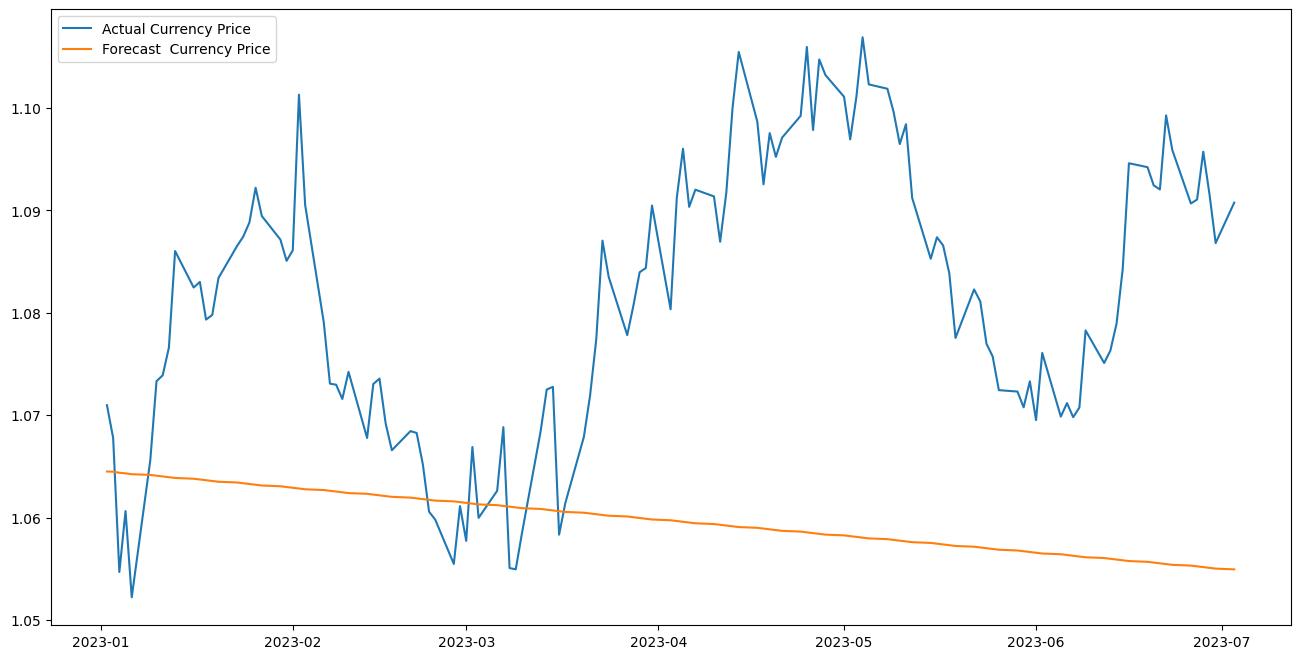

In [214]:
plt.figure(figsize=(16,8))
plt.plot(test_data_currency['Original_USD_EUR_Price'],label="Actual Currency Price")
plt.plot(test_data_currency['Original_USD_EUR_Price_predicted'],label="Forecast  Currency Price")
plt.legend(loc="upper left")